In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import expon, chi2

In [2]:
entries_num = 10000
bins_num = 50
alpha = 0.05

In [3]:
def merge_bins(x, bins, min_entries=5):
    merged_bins = bins
    small_bins = np.where(np.histogram(x, bins=merged_bins)[0] < min_entries)[0]
    if len(small_bins) == 0:
        return merged_bins
    merged_bins = np.delete(merged_bins, small_bins[len(small_bins) - 1])
    return merge_bins(x, merged_bins)

In [4]:
def get_chi_squared_stat(observed_data, expected_frequencies, bins):
    observed_frequencies = np.histogram(observed_data, bins=bins, density=True)[0]
    chi_squared_stat = np.sum((observed_frequencies - expected_frequencies) ** 2 / expected_frequencies)
    critical_val = chi2.ppf(1-alpha, len(bins)-1)
    return chi_squared_stat, critical_val

Експоненційний розподіл

In [5]:
lambda_vals = [0.1, 0.5, 1, 1.5, 2]

In [6]:
def get_random_exp_nums(lam):
    rand_nums = np.random.rand(entries_num)
    return (-1 / lam) * np.log(rand_nums)

In [7]:
def get_x_theor(x_max, lam, bins=bins_num):
    x_theor_range = np.linspace(0, x_max, bins)
    theor_pdf = np.e ** (-lam * x_theor_range) * lam
    return x_theor_range, theor_pdf

Середнє = 10.001302661752622
Дисперсія = 100.48021224031707
Статистика Х^2: 0.1296445255661821
Критичне значення Х^2: 52.192319730102895
Не відхиляємо нульову гіпотезу


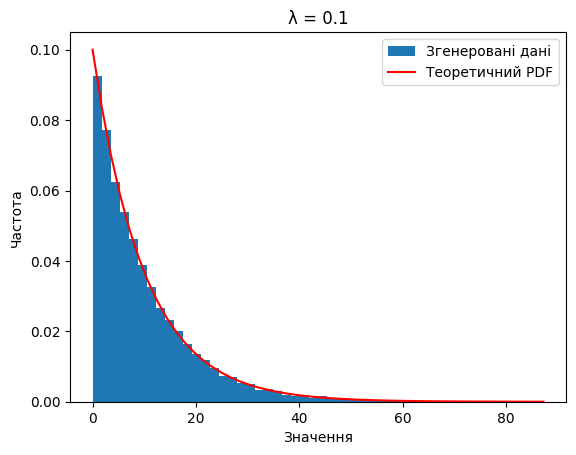

Середнє = 2.0102400469572372
Дисперсія = 4.014048099681763
Статистика Х^2: 2.876472605514955
Критичне значення Х^2: 43.77297182574219
Не відхиляємо нульову гіпотезу


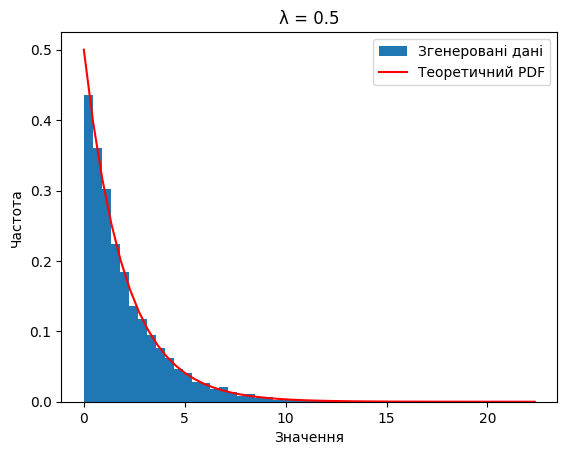

Середнє = 1.0076917773559646
Дисперсія = 0.99547233007886
Статистика Х^2: 3.674960695879509
Критичне значення Х^2: 46.19425952027847
Не відхиляємо нульову гіпотезу


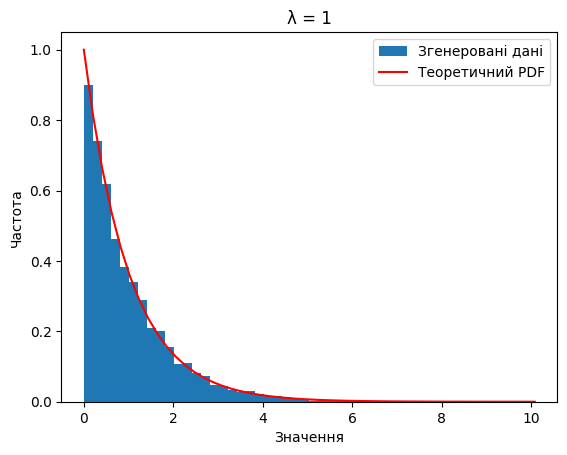

Середнє = 0.6691604772903705
Дисперсія = 0.43860406849503525
Статистика Х^2: 2.9839100138344845
Критичне значення Х^2: 49.80184956820181
Не відхиляємо нульову гіпотезу


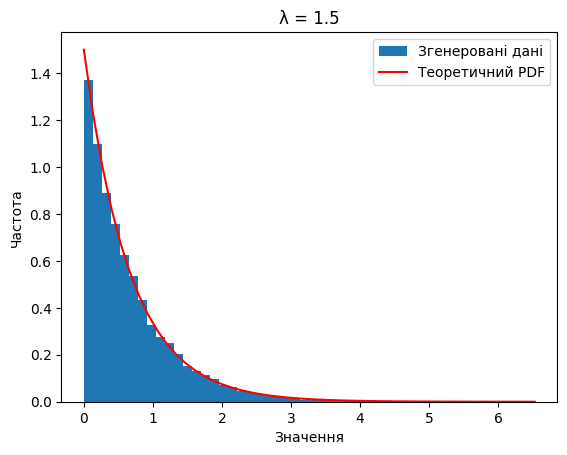

Середнє = 0.4970667262766874
Дисперсія = 0.25345814429478764
Статистика Х^2: 5.930457945730138
Критичне значення Х^2: 47.39988391908093
Не відхиляємо нульову гіпотезу


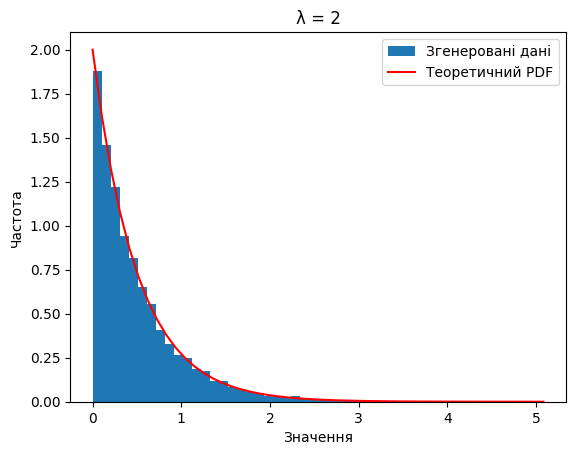

In [8]:
for lam in lambda_vals:
    x = get_random_exp_nums(lam)
    hist, bins = np.histogram(x, bins=bins_num)
    plt.hist(x, bins=bins_num, density=True, label="Згенеровані дані")

    x_max = np.max(x)
    x_theor_range, theor_pdf = get_x_theor(x_max, lam)
    plt.plot(x_theor_range, theor_pdf, "r-", label="Теоретичний PDF")

    mean = np.mean(x)
    variance = np.var(x)

    merged_bins = merge_bins(x, bins)
    updated_theor_pdf = get_x_theor(x_max, lam, bins=len(merged_bins)-1)[1]

    chi_squared_stat, critical_val = get_chi_squared_stat(x, updated_theor_pdf, merged_bins)

    print(f"Середнє = {mean}")
    print(f"Дисперсія = {variance}")
    print(f"Статистика Х^2: {chi_squared_stat}")
    print(f"Критичне значення Х^2: {critical_val}")

    if critical_val < chi_squared_stat:
        print(f"Відхиляємо нульову гіпотезу")
    else:
        print(f"Не відхиляємо нульову гіпотезу")

    plt.legend()
    plt.title(f"λ = {lam}")
    plt.xlabel("Значення")
    plt.ylabel("Частота")
    plt.show()

Нормальний розподіл

In [9]:
from scipy.stats import norm

In [18]:
a_vals = [-1, 0, 1]
sigma_vals = [0.5, 1, 4]

In [11]:
def mu():
    return np.sum(np.random.rand(12)) - 6

Середнє = -0.9928418431126693
Дисперсія = 0.24755196138937827
Статистика Х^2: 0.6637549283542286
Критичне значення Х^2: 62.829620411408165
Не відхиляємо нульову гіпотезу


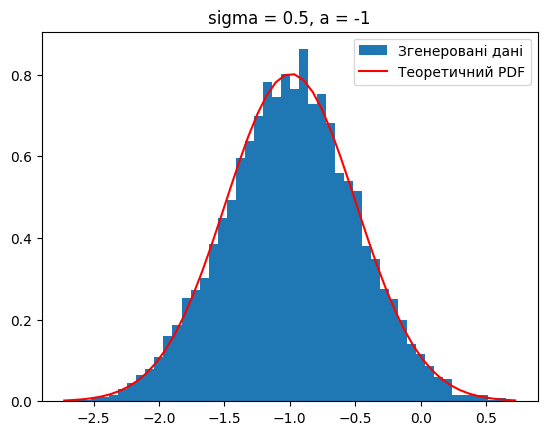

Середнє = -0.9864266844522143
Дисперсія = 1.0150351806402051
Статистика Х^2: 2.9660605935766022
Критичне значення Х^2: 55.75847927888702
Не відхиляємо нульову гіпотезу


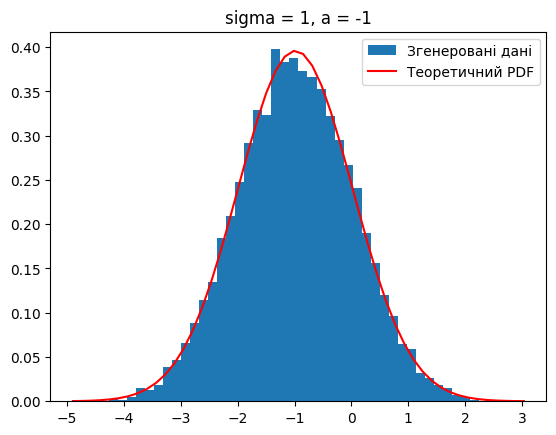

Середнє = -1.0158522154809477
Дисперсія = 16.255359596677664
Статистика Х^2: 1.09600624616874
Критичне значення Х^2: 54.572227758941736
Не відхиляємо нульову гіпотезу


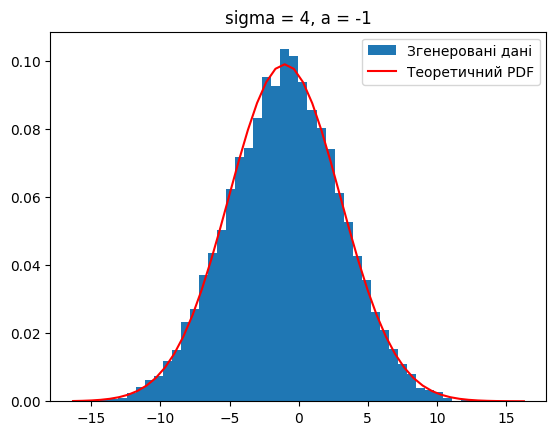

Середнє = 0.008479531624676882
Дисперсія = 0.2479125148099342
Статистика Х^2: 3.662183695722352
Критичне значення Х^2: 59.30351202689981
Не відхиляємо нульову гіпотезу


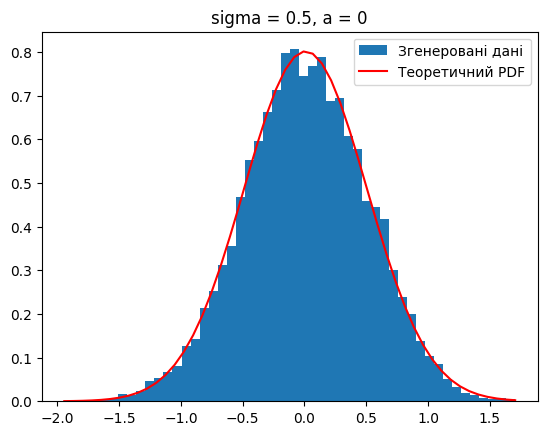

Середнє = 0.0018985624872380463
Дисперсія = 1.0033035455620958
Статистика Х^2: 1.2593626851868687
Критичне значення Х^2: 58.12403768086803
Не відхиляємо нульову гіпотезу


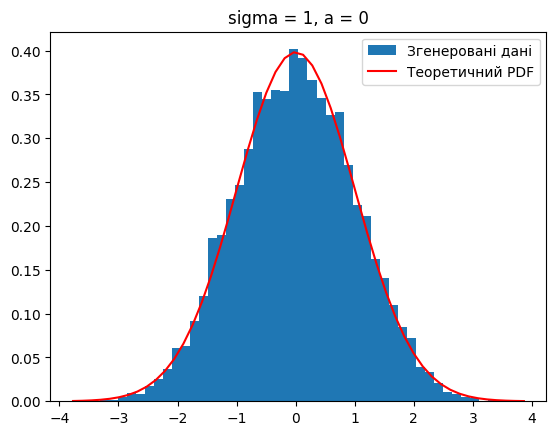

Середнє = -0.013645932955679558
Дисперсія = 15.844168340057694
Статистика Х^2: 0.3355831980503726
Критичне значення Х^2: 58.12403768086803
Не відхиляємо нульову гіпотезу


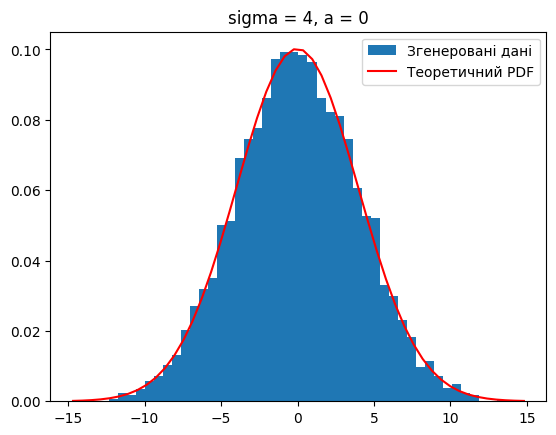

Середнє = 0.9959628306721028
Дисперсія = 0.25107920679538615
Статистика Х^2: 0.6124611483443305
Критичне значення Х^2: 62.829620411408165
Не відхиляємо нульову гіпотезу


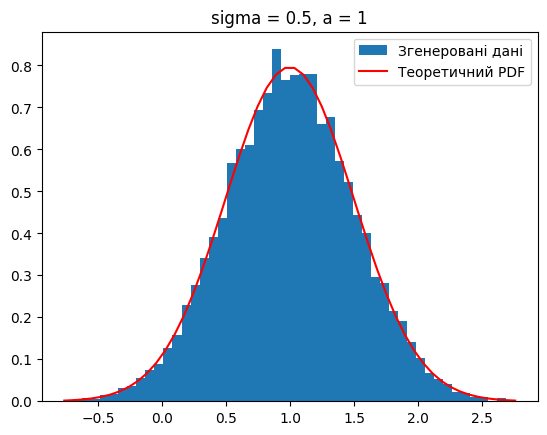

Середнє = 0.996312781875908
Дисперсія = 0.981895469565857
Статистика Х^2: 1.6555469021298344
Критичне значення Х^2: 58.12403768086803
Не відхиляємо нульову гіпотезу


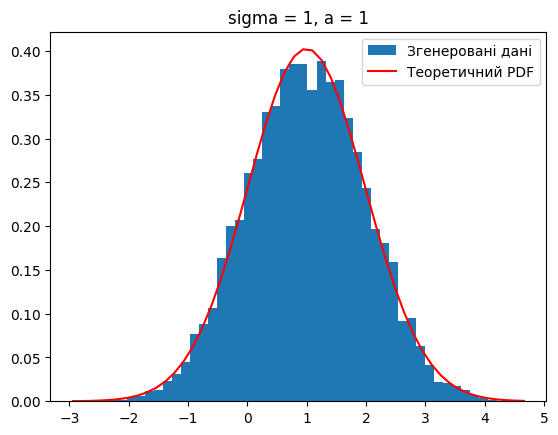

Середнє = 0.9048999425566997
Дисперсія = 15.956597404746008
Статистика Х^2: 0.506111884177577
Критичне значення Х^2: 60.480886582336446
Не відхиляємо нульову гіпотезу


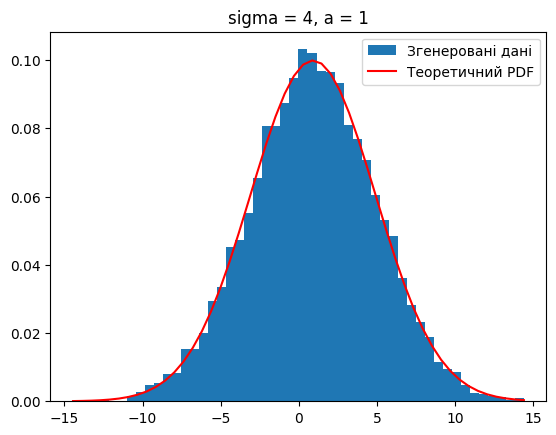

In [19]:
for a in a_vals:
    for sigma in sigma_vals:
        x = sigma * np.array([mu() for _ in range(entries_num)]) + a
        hist, bins = np.histogram(x, bins=bins_num)
        plt.hist(x, bins=bins_num, density=True, label=f"Згенеровані дані")

        mean = np.mean(x)
        variance = np.var(x)

        x_range = np.linspace(min(x), max(x), bins_num)
        theor_pdf = norm.pdf(x_range, loc=mean, scale=np.sqrt(variance))
        plt.plot(x_range, theor_pdf, 'r-', label="Теоретичний PDF")

        merged_bins = merge_bins(x, bins)

        updated_x_range = np.linspace(min(x), max(x), len(merged_bins)-1)
        updated_theor_pdf = norm.pdf(updated_x_range, loc=mean, scale=np.sqrt(variance))
        
        chi_squared_stat, critical_val = get_chi_squared_stat(x, updated_theor_pdf, merged_bins)

        print(f"Середнє = {mean}")
        print(f"Дисперсія = {variance}")
        print(f"Статистика Х^2: {chi_squared_stat}")
        print(f"Критичне значення Х^2: {critical_val}")

        if critical_val < chi_squared_stat:
            print(f"Відхиляємо нульову гіпотезу")
        else:
            print(f"Не відхиляємо нульову гіпотезу")

        plt.title(f"sigma = {sigma}, a = {a}")
        plt.legend()
        plt.show()

        

Рівномірний розподіл

In [14]:
from scipy.stats import uniform

In [24]:
a_vals = [5**13, 3**12, 4**4]
c_vals = [2**31, 2**10, 8**14]

In [25]:
def generate_uniform(a, c):
    z = np.zeros(entries_num)
    z[0] = 1
    for i in range(1, entries_num):
        z[i] = (a * z[i-1]) % c
    return z / c

Середнє = 0.4976802491496317
Дисперсія = 0.08397034843557476
Статистика Х^2: 0.13145402339248888
Критичне значення Х^2: 67.5048065495412
Не відхиляємо нульову гіпотезу


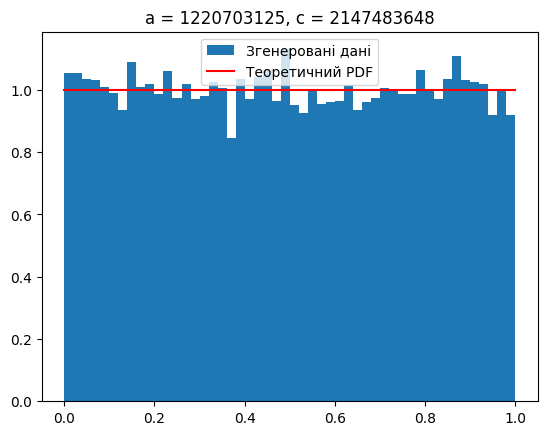

Середнє = 0.4989109375
Дисперсія = 0.08336476395507812
Статистика Х^2: 0.2037012472126105
Критичне значення Х^2: 67.5048065495412
Не відхиляємо нульову гіпотезу


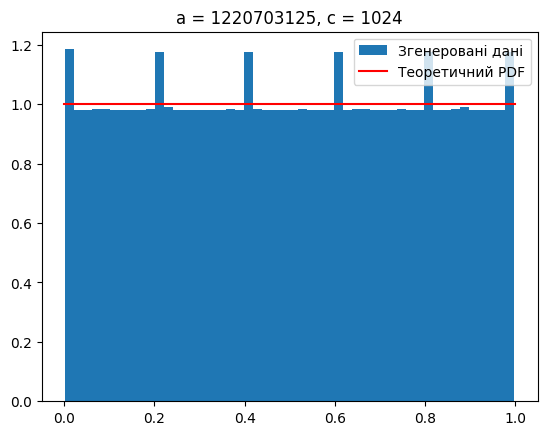

Середнє = 0.49928582761534834
Дисперсія = 0.08406586915199886
Статистика Х^2: 0.27287062871197876
Критичне значення Х^2: 67.5048065495412
Не відхиляємо нульову гіпотезу


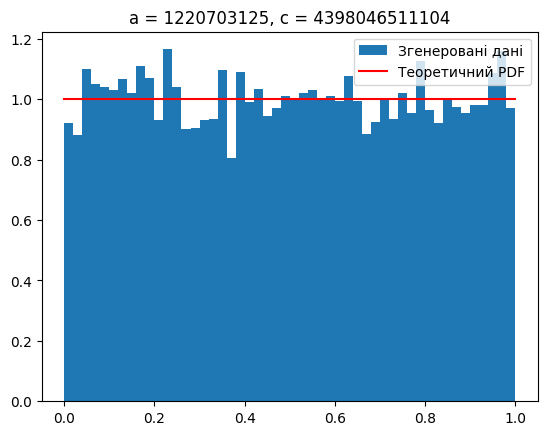

Середнє = 0.49840224275067446
Дисперсія = 0.08329316203573434
Статистика Х^2: 0.2713549709855319
Критичне значення Х^2: 67.5048065495412
Не відхиляємо нульову гіпотезу


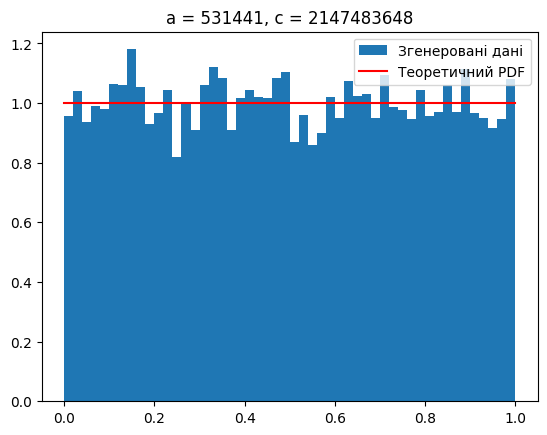

Середнє = 0.4930890625
Дисперсія = 0.08333056078125
Статистика Х^2: 6.3702212144116865
Критичне значення Х^2: 67.5048065495412
Не відхиляємо нульову гіпотезу


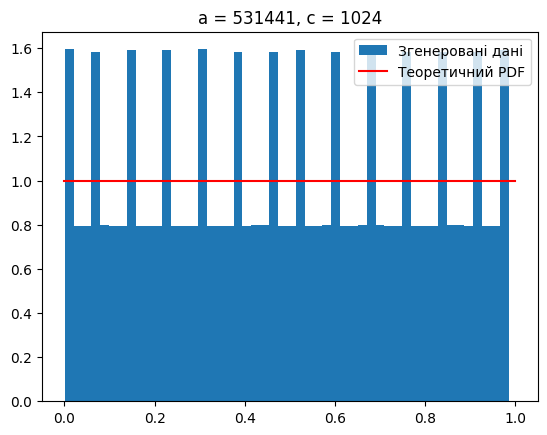

Середнє = 0.5018062748770853
Дисперсія = 0.08349560618693816
Статистика Х^2: 0.22025102027184076
Критичне значення Х^2: 67.5048065495412
Не відхиляємо нульову гіпотезу


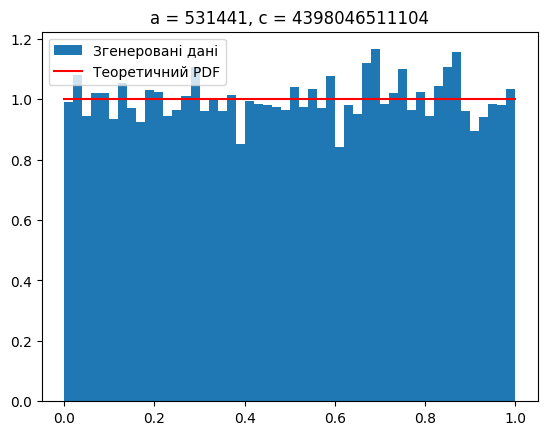

Середнє = 7.843137253075838e-07
Дисперсія = 6.102993610658867e-09
Статистика Х^2: 16129.0
Критичне значення Х^2: 3.841458820694124
Відхиляємо нульову гіпотезу


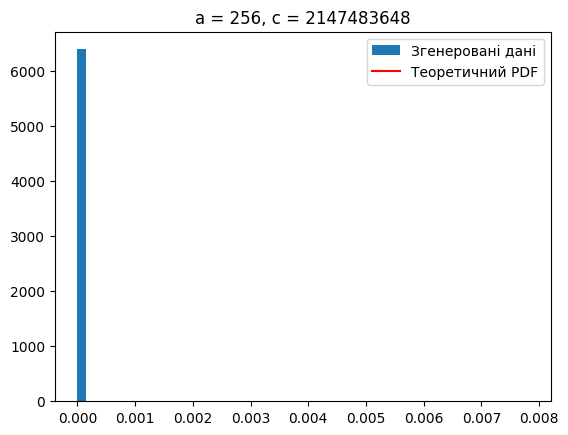

Середнє = 2.509765625e-05
Дисперсія = 6.249465475082394e-06
Статистика Х^2: 9.0
Критичне значення Х^2: 3.841458820694124
Відхиляємо нульову гіпотезу


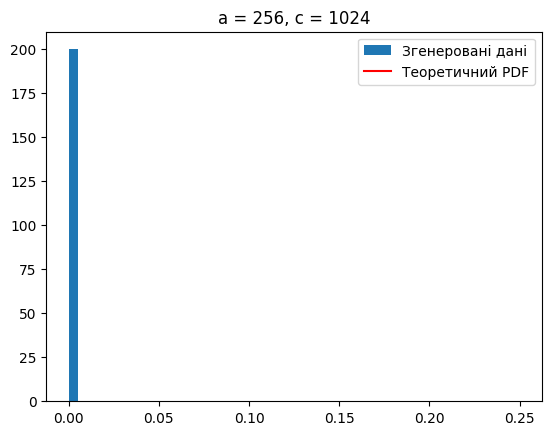

Середнє = 2.5098039215686185e-05
Дисперсія = 6.249465457314385e-06
Статистика Х^2: 9.0
Критичне значення Х^2: 3.841458820694124
Відхиляємо нульову гіпотезу


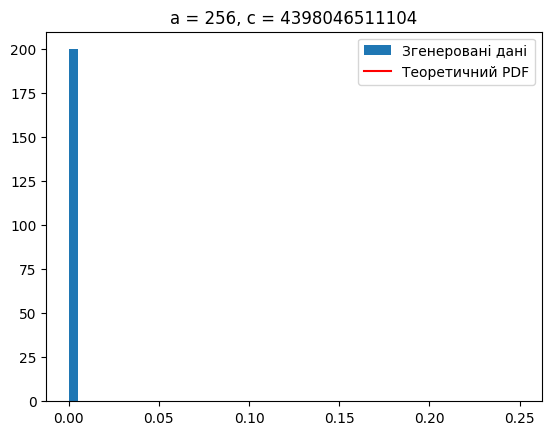

In [26]:
for a in a_vals:
    for c in c_vals:
        x = generate_uniform(a, c)
        hist, bins = np.histogram(x, bins=bins_num)
        plt.hist(x, bins=bins_num, density=True, label=f"Згенеровані дані")

        mean = np.mean(x)
        variance = np.var(x)

        merged_bins = merge_bins(x, bins)
        merged_freq = np.histogram(x, bins=merged_bins, density=True)[0]

        x_range = np.linspace(0, 1, len(merged_bins)-1)
        theor_pdf = uniform.pdf(x_range)
        plt.plot(x_range, theor_pdf, 'r-', label="Теоретичний PDF")

        chi_squared_stat, critical_val = get_chi_squared_stat(x, theor_pdf, merged_bins)

        print(f"Середнє = {mean}")
        print(f"Дисперсія = {variance}")
        print(f"Статистика Х^2: {chi_squared_stat}")
        print(f"Критичне значення Х^2: {critical_val}")

        if critical_val < chi_squared_stat:
            print(f"Відхиляємо нульову гіпотезу")
        else:
            print(f"Не відхиляємо нульову гіпотезу")

        plt.title(f"a = {a}, c = {c}")
        plt.legend()
        plt.show()